In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [105]:
housing = pd.read_csv("/kaggle/input/boston-housepredict/boston_train.csv")

In [106]:
housing

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [107]:
housing.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [108]:
housing.shape

(333, 15)

In [109]:
Miss_Percent=100*(housing.isnull().sum()/len(housing))

#Sorting the data columns by their percentage in descending order
Miss_Percent=Miss_Percent[Miss_Percent>0].sort_values(ascending=False).round(1)

#Creating a dataframe to show percentage of missing data and its respective data column in table
DataFrame=pd.DataFrame(Miss_Percent)
miss_percent_table=DataFrame.rename(columns={0:'% of Missing Values'})
MissPercent=miss_percent_table

#Displaying Missing Value table
MissPercent

,% of Missing Values


In [110]:
housing=housing.drop('ID',axis=1)

<Axes: xlabel='rm', ylabel='medv'>

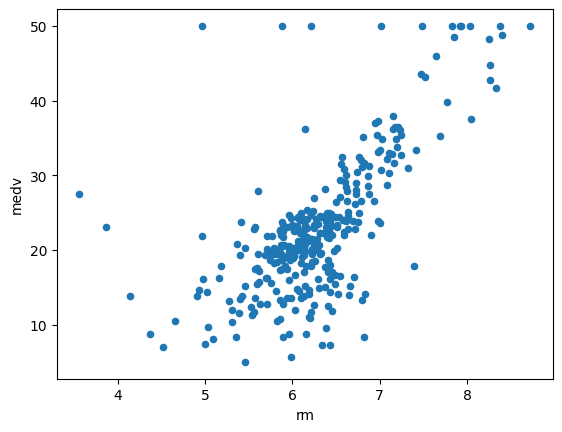

In [111]:
housing.plot.scatter('rm', 'medv')

In [112]:
X = housing[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = housing['medv'] #median value of owner-occupied homes

In [113]:
#splitting our data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [115]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [116]:
predictions = lm.predict(X_test)

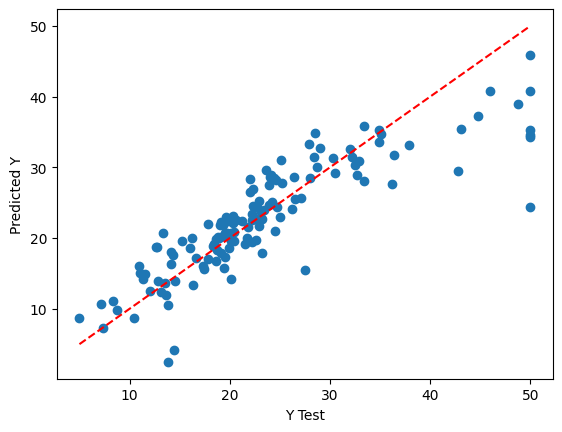

In [117]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
# Add a line of comparison
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of comparison in red dashed line

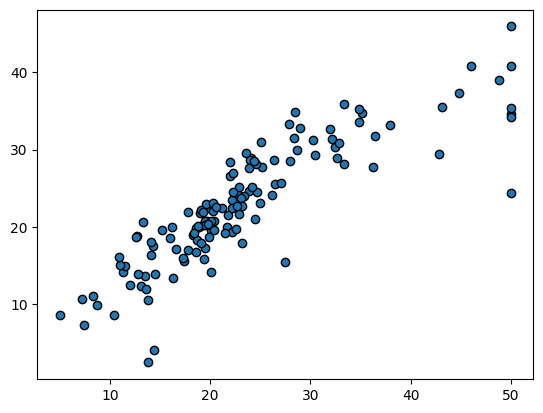

In [121]:
plt.scatter(y_test, predictions, edgecolor='black')

In [118]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MSE: 25.056942086517324
MAE: 3.3716135384406085


/tmp/ipykernel_32/1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


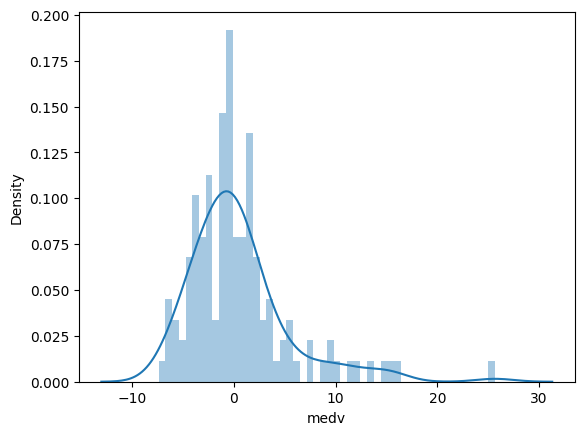

In [119]:
sns.distplot((y_test-predictions),bins=50);